In [1]:
#https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [2]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score
    #print("{:-<40} {}".format(sentence, str(score)))

In [3]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
from gensim import corpora, models
from scipy import stats,mean
import math
from scipy.stats import sem, t

In [4]:
df=pd.read_csv('NLP part 1.csv')

In [5]:
# Part 1 analysis independent to everything

In [6]:
df_for_1=pd.read_csv('NLP part 1 for analysis.csv')
df_final=df_for_1[['No of parts answered for Q17','No of parts answered for Q9','No of parts answered for Q10','No of parts answered for Q16','No of parts answered for Q11','No of parts answered for Q8','No of parts answered for Q14','No of parts answered for Q15','No of parts answered for Q7','No of parts answered for Q13','No of parts answered for Q6','No of parts answered for Q1']]

In [7]:
df_final = df_final.iloc[6:]

In [8]:
m=mean(df_final)
m

No of parts answered for Q17    3.733108
No of parts answered for Q9     3.557432
No of parts answered for Q10    4.081081
No of parts answered for Q16    4.101351
No of parts answered for Q11    3.932432
No of parts answered for Q8     4.570946
No of parts answered for Q14    4.162162
No of parts answered for Q15    4.209459
No of parts answered for Q7     4.425676
No of parts answered for Q13    5.070946
No of parts answered for Q6     5.179054
No of parts answered for Q1     5.942568
dtype: float64

In [9]:
std_err = sem(df_final)
std_err

array([0.17893906, 0.179677  , 0.1789435 , 0.17736555, 0.18087209,
       0.17402665, 0.18381039, 0.18464329, 0.18136895, 0.17918193,
       0.17699553, 0.1655798 ])

In [10]:
confidence=.95
n=len(df_final)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)
n

296

In [11]:
stats.ttest_rel(df_final['No of parts answered for Q1'],df_final['No of parts answered for Q7'])

Ttest_relResult(statistic=11.392993857929614, pvalue=3.650386699293624e-25)

In [12]:
stats.ttest_ind(df_final.dropna()['No of parts answered for Q1'], df_final.dropna()['No of parts answered for Q7'])

Ttest_indResult(statistic=6.176679202778881, pvalue=1.2198102734263898e-09)

In [13]:
# Part 2 analysis

In [14]:
ndf=df.drop(columns=['StartDate', 'EndDate','Status','Progress','Duration (in seconds)','Finished','RecordedDate','ResponseId','RecipientLastName','RecipientFirstName','RecipientEmail','ExternalReference','LocationLatitude','LocationLongitude','DistributionChannel','UserLanguage'])

In [15]:
ndf["Q1"] = ndf["Q1_1"].map(str) + ' ' + ndf["Q1_2"] +' ' +  ndf["Q1_3"] + ' ' + ndf["Q1_4"]+' ' +  ndf["Q1_5"]+ ' ' + ndf["Q1_6"]+ ' ' + ndf["Q1_7"]+' ' +  ndf["Q1_8"]
ndf["Q6"] = ndf["Q6_1"].map(str) + ' ' + ndf["Q6_2"] + ' ' + ndf["Q6_3"] + ' ' + ndf["Q6_4"]+ ' ' + ndf["Q6_5"]+' ' +  ndf["Q6_6"]+ ' ' + ndf["Q6_7"]+ ' ' + ndf["Q6_8"]
ndf["Q13"] = ndf["Q13_1"].map(str) + ' ' + ndf["Q13_2"] +' ' +  ndf["Q13_3"] +' ' +  ndf["Q13_4"]+ ' ' + ndf["Q13_5"]+' ' +  ndf["Q13_6"]+ ' ' + ndf["Q13_7"]+' ' +  ndf["Q13_8"]
ndf["Q7"] = ndf["Q7_1"].map(str) +' ' +  ndf["Q7_2"] +' ' +  ndf["Q7_3"] + ' ' + ndf["Q7_4"]+ ' ' + ndf["Q7_5"]+' ' +  ndf["Q7_6"]+' ' +  ndf["Q7_7"]+' ' +  ndf["Q7_8"]
ndf["Q15"] = ndf["Q15_1"].map(str) + ' ' + ndf["Q15_2"] +' ' +  ndf["Q15_3"] + ' ' + ndf["Q15_4"]+' ' +  ndf["Q15_5"]+ ' ' + ndf["Q15_6"]+ ' ' + ndf["Q15_7"]+ ' ' + ndf["Q15_8"]
ndf["Q14"] = ndf["Q14_1"].map(str) + ' ' + ndf["Q14_2"] +' ' +  ndf["Q14_3"] + ' ' + ndf["Q14_4"]+' ' +  ndf["Q14_5"]+ ' ' + ndf["Q14_6"]+ ' ' + ndf["Q14_7"]+' ' +  ndf["Q14_8"]
ndf["Q8"] = ndf["Q8_1"].map(str) + ' ' + ndf["Q8_2"] +' ' +  ndf["Q8_3"] + ' ' + ndf["Q8_4"]+' ' +  ndf["Q8_5"]+' ' +  ndf["Q8_6"]+' ' +  ndf["Q8_7"]+' ' +  ndf["Q8_8"]
ndf["Q11"] = ndf["Q11_1"].map(str) + ' ' + ndf["Q11_2"] +' ' +  ndf["Q11_3"] +' ' +  ndf["Q11_4"]+' ' +  ndf["Q11_5"]+ ' ' + ndf["Q11_6"]+' ' +  ndf["Q11_7"]+ ' ' + ndf["Q11_8"]
ndf["Q16"] = ndf["Q16_1"].map(str) +' ' +  ndf["Q16_2"] +' ' +  ndf["Q16_3"] +' ' +  ndf["Q16_4"]+ ' ' + ndf["Q16_5"]+' ' +  ndf["Q16_6"]+ ' ' + ndf["Q16_7"]+' ' +  ndf["Q16_8"]
ndf["Q10"] = ndf["Q10_1"].map(str) + ' ' + ndf["Q10_2"] + ' ' + ndf["Q10_3"] + ' ' + ndf["Q10_4"]+ ' ' + ndf["Q10_5"]+ ' ' + ndf["Q10_6"]+ ' ' + ndf["Q10_7"]+ ' ' + ndf["Q10_8"]
ndf["Q9"] = ndf["Q9_1"].map(str) +' ' +  ndf["Q9_2"] +' ' +  ndf["Q9_3"] + ' ' + ndf["Q9_4"]+ ' ' + ndf["Q9_5"]+ ' ' + ndf["Q9_6"]+ ' ' + ndf["Q9_7"]+' ' +  ndf["Q9_8"]
ndf["Q17"] = ndf["Q17_1"].map(str) + ' ' + ndf["Q17_2"] + ' ' + ndf["Q17_3"] +' ' +  ndf["Q17_4"]+ ' ' + ndf["Q17_5"]+' ' +  ndf["Q17_6"]+ ' ' + ndf["Q17_7"]+' ' +  ndf["Q17_8"]

In [16]:
mdf=ndf.drop(columns=['No of parts not answered for Q1','No of parts not answered for Q17','No of parts not answered for Q9','No of parts not answered for Q10','No of parts not answered for Q16','No of parts not answered for Q11','No of parts not answered for Q8','No of parts not answered for Q14','No of parts not answered for Q15','No of parts not answered for Q7','No of parts not answered for Q1','No of parts not answered for Q7','No of parts not answered for Q1','No of parts not answered for Q6','No of parts not answered for Q13','Q19','Q1_1','Q1_2','Q1_3','Q1_4','Q1_5','Q1_6','Q1_7','Q1_8','Q6_1','Q6_2','Q6_3','Q6_4','Q6_5','Q6_6','Q6_7','Q6_8','Q13_1','Q13_2','Q13_3','Q13_4','Q13_5','Q13_6','Q13_7','Q13_8','Q7_1','Q7_2','Q7_3','Q7_4','Q7_5','Q7_6','Q7_7','Q7_8','Q15_1','Q15_2','Q15_3','Q15_4','Q15_5','Q15_6','Q15_7','Q15_8','Q14_1','Q14_2','Q14_3','Q14_4','Q14_5','Q14_6','Q14_7','Q14_8','Q8_1','Q8_2','Q8_3','Q8_4','Q8_5','Q8_6','Q8_7','Q8_8','Q11_1','Q11_2','Q11_3','Q11_4','Q11_5','Q11_6','Q11_7','Q11_8','Q16_1','Q16_2','Q16_3','Q16_4','Q16_5','Q16_6','Q16_7','Q16_8','Q10_1','Q10_2','Q10_3','Q10_4','Q10_5','Q10_6','Q10_7','Q10_8','Q9_1','Q9_2','Q9_3','Q9_4','Q9_5','Q9_6','Q9_7','Q9_8','Q17_1','Q17_2','Q17_3','Q17_4','Q17_5','Q17_6','Q17_7','Q17_8'])

In [17]:
jdf=mdf.drop([0, 1, 2, 64,74,85,138,150,144,198,199,239,242,250,292 ])

In [18]:
jdf.to_csv(r'C:\Users\avich\python-projects\UIUC\PreComputing.csv')

In [19]:
'''jdf['Q1f']=jdf['Q1'].str.cat(sep=' ')
jdf['Q6f']=jdf['Q6'].str.cat(sep=' ')
jdf['Q13f']=jdf['Q13'].str.cat(sep=' ')
jdf['Q7f']=jdf['Q7'].str.cat(sep=' ')
jdf['Q15f']=jdf['Q15'].str.cat(sep=' ')
jdf['Q14f']=jdf['Q14'].str.cat(sep=' ')
jdf['Q8f']=jdf['Q8'].str.cat(sep=' ')
jdf['Q11f']=jdf['Q11'].str.cat(sep=' ')
jdf['Q16f']=jdf['Q16'].str.cat(sep=' ')
jdf['Q10f']=jdf['Q10'].str.cat(sep=' ')
jdf['Q9f']=jdf['Q9'].str.cat(sep=' ')
jdf['Q17f']=jdf['Q17'].str.cat(sep=' ')



#sentiment_analyzer_scores(jdf['Q1f'].iloc[0])
#sentiment_analyzer_scores(jdf['Q6f'].iloc[0])... 
from this..
we get this result ->{'neg': 0.053, 'neu': 0.666, 'pos': 0.281, 'compound': 1.0}
'''

"jdf['Q1f']=jdf['Q1'].str.cat(sep=' ')\njdf['Q6f']=jdf['Q6'].str.cat(sep=' ')\njdf['Q13f']=jdf['Q13'].str.cat(sep=' ')\njdf['Q7f']=jdf['Q7'].str.cat(sep=' ')\njdf['Q15f']=jdf['Q15'].str.cat(sep=' ')\njdf['Q14f']=jdf['Q14'].str.cat(sep=' ')\njdf['Q8f']=jdf['Q8'].str.cat(sep=' ')\njdf['Q11f']=jdf['Q11'].str.cat(sep=' ')\njdf['Q16f']=jdf['Q16'].str.cat(sep=' ')\njdf['Q10f']=jdf['Q10'].str.cat(sep=' ')\njdf['Q9f']=jdf['Q9'].str.cat(sep=' ')\njdf['Q17f']=jdf['Q17'].str.cat(sep=' ')\n\n\n\n#sentiment_analyzer_scores(jdf['Q1f'].iloc[0])\n#sentiment_analyzer_scores(jdf['Q6f'].iloc[0])... \nfrom this..\nwe get this result ->{'neg': 0.053, 'neu': 0.666, 'pos': 0.281, 'compound': 1.0}\n"

In [20]:
df_new = jdf[jdf['Q1'].notnull()]
df_new['scores for Q1'] = df_new.apply(lambda x: sentiment_analyzer_scores(x.Q1), axis=1)

C:\Users\avich\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
df_new = df_new[df_new['Q6'].notnull()]
df_new['scores for Q6'] = df_new.apply(lambda x: sentiment_analyzer_scores(x.Q6), axis=1)

In [22]:
df_new = df_new[df_new['Q13'].notnull()]
df_new['scores for Q13'] = df_new.apply(lambda x: sentiment_analyzer_scores(x.Q13), axis=1)

In [23]:
df_new = df_new[df_new['Q15'].notnull()]
df_new['scores for Q15'] = df_new.apply(lambda x: sentiment_analyzer_scores(x.Q15), axis=1)

In [24]:
df_new = df_new[df_new['Q7'].notnull()]
df_new['scores for Q7'] = df_new.apply(lambda x: sentiment_analyzer_scores(x.Q7), axis=1)

In [25]:
df_new = df_new[df_new['Q14'].notnull()]
df_new['scores for Q14'] = df_new.apply(lambda x: sentiment_analyzer_scores(x.Q14), axis=1)

In [26]:
df_new = df_new[df_new['Q8'].notnull()]
df_new['scores for Q8'] = df_new.apply(lambda x: sentiment_analyzer_scores(x.Q8), axis=1)

In [27]:
df_new = df_new[df_new['Q11'].notnull()]
df_new['scores for Q11'] = df_new.apply(lambda x: sentiment_analyzer_scores(x.Q11), axis=1)

In [28]:
df_new = df_new[df_new['Q16'].notnull()]
df_new['scores for Q16'] = df_new.apply(lambda x: sentiment_analyzer_scores(x.Q16), axis=1)

In [29]:
df_new = df_new[df_new['Q10'].notnull()]
df_new['scores for Q10'] = df_new.apply(lambda x: sentiment_analyzer_scores(x.Q10), axis=1)

In [30]:
df_new = df_new[df_new['Q9'].notnull()]
df_new['scores for Q9'] = df_new.apply(lambda x: sentiment_analyzer_scores(x.Q9), axis=1)

In [31]:
df_new = df_new[df_new['Q17'].notnull()]
df_new['scores for Q17'] = df_new.apply(lambda x: sentiment_analyzer_scores(x.Q17), axis=1)

In [32]:
df_new.to_csv(r'C:\Users\avich\python-projects\UIUC\Final A1.csv')

In [33]:
# for part 2

In [34]:
# Segregates all the scores into different columns

k0df=json_normalize(df_new['scores for Q1'])

kdf=json_normalize(df_new['scores for Q6'])

k1df=json_normalize(df_new['scores for Q13'])

k2df=json_normalize(df_new['scores for Q15'])

k3df=json_normalize(df_new['scores for Q7'])

k4df=json_normalize(df_new['scores for Q14'])

k5df=json_normalize(df_new['scores for Q8'])

k6df=json_normalize(df_new['scores for Q11'])

k7df=json_normalize(df_new['scores for Q16'])

k8df=json_normalize(df_new['scores for Q10'])

k9df=json_normalize(df_new['scores for Q9'])

k10df=json_normalize(df_new['scores for Q17'])

In [35]:
k10df['neu'].mean()

0.582257575757576

In [36]:
np.std(k10df['neu'])

0.24235744392204267

In [37]:
# Paired T tests
tn17, pn17 = stats.ttest_rel(k0df['neg'], k3df['neg'])
tp17, pp17 = stats.ttest_rel(k0df['pos'], k3df['pos'])
tu17, pu17 = stats.ttest_rel(k0df['neu'], k3df['neu'])

tn615, pn615 = stats.ttest_rel(kdf['neg'], k2df['neg'])
tp615, pp615 = stats.ttest_rel(kdf['pos'], k2df['pos'])
tu615, pu615 = stats.ttest_rel(kdf['neu'], k2df['neu'])

tn1314, pn1314 = stats.ttest_rel(k1df['neg'], k4df['neg'])
tp1314, pp1314 = stats.ttest_rel(k1df['pos'], k4df['pos'])
tu1314, pu1314 = stats.ttest_rel(k1df['neu'], k4df['neu'])

tn810, pn810 = stats.ttest_rel(k5df['neg'], k8df['neg'])
tp810, pp810 = stats.ttest_rel(k5df['pos'], k8df['pos'])
tu810, pu810 = stats.ttest_rel(k5df['neu'], k8df['neu'])

tn119, pn119 = stats.ttest_rel(k6df['neg'], k9df['neg'])
tp119, pp119 = stats.ttest_rel(k6df['pos'], k9df['pos'])
tu119, pu119 = stats.ttest_rel(k6df['neu'], k9df['neu'])

tn1617, pn1617 = stats.ttest_rel(k7df['neg'], k10df['neg'])
tp1617, pp1617 = stats.ttest_rel(k7df['pos'], k10df['pos'])
tu1617, pu1617 = stats.ttest_rel(k7df['neu'], k10df['neu'])

In [38]:
tu1617

-0.6196711378127602

In [39]:
# Text analysis
# https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

In [40]:
ldf=df_new.drop(['IPAddress','scores for Q1','scores for Q6','scores for Q13','scores for Q15','scores for Q7','scores for Q14','scores for Q8','scores for Q11','scores for Q16','scores for Q10','scores for Q9','scores for Q17'],axis=1)
text = ldf.to_string(index = False)
str1 = ''.join(text)
strf=str1.lower()

In [87]:
import nltk
from nltk.tokenize import sent_tokenize

tokenized_text=sent_tokenize(strf)

In [88]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(strf)

In [89]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 1750 samples and 7030 outcomes>


In [90]:
fdist.most_common(2)

[('...', 729), ('good', 207)]

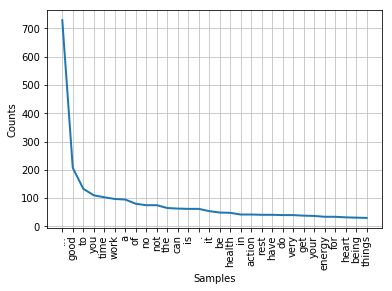

In [91]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [92]:
# Spell Checker
#https://stackoverflow.com/questions/13928155/spell-checker-for-python
#http://norvig.com/spell-correct.html

In [93]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [94]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['q1', 'q6', 'q13', 'q7', 'q15', 'q14', 'q8', 'q11', 'q16', 'q10', 'q9', 'q17', 'you', 'are', 'doing', 'something', 'active', 'can', 'result', 'in', 'a', '...', 'could', 'make', 'the', 'wrong', 'choice', 'could', 'lead', 'to', 'wors', '...', 'drive', 'understanding', 'plan', 'effort', 'desire', 'skill', 't', '...', 'rest', 'no', 'need', 'to', 'plan', 'no', 'need', 'to', 'design', 'free', 'ti', '...', 'things', 'could', 'get', 'worse', 'might', 'miss', 'something', 'mi', '...', 'lazy', 'depression', 'no', 'drive', 'no', 'motivation', 'no', 'desi', '...', 'healthy', 'strong', 'build', 'muscle', 'burn', 'calories', 'gain', '...', 'takes', 'time', 'takes', 'energy', 'can', 'cause', 'pain', 'deal', 'wi', '...', 'good', 'routine', 'good', 'energy', 'levels', 'good', 'sleep', 'goo', '...', 'better', 'health', 'feeling', 'rested', 'better', 'mental', 'hea', '...', 'back', 'can', 'hurt', 'can', 'wake', 'up', 'not', 'feeling', 'rested', 't', '...', 'good', 'lighting', 'good',

Filterd Sentence: ['q1', 'q6', 'q13', 'q7', 'q15', 'q14', 'q8', 'q11', 'q16', 'q10', 'q9', 'q17', 'something', 'active', 'result', '...', 'could', 'make', 'wrong', 'choice', 'could', 'lead', 'wors', '...', 'drive', 'understanding', 'plan', 'effort', 'desire', 'skill', '...', 'rest', 'need', 'plan', 'need', 'design', 'free', 'ti', '...', 'things', 'could', 'get', 'worse', 'might', 'miss', 'something', 'mi', '...', 'lazy', 'depression', 'drive', 'motivation', 'desi', '...', 'healthy', 'strong', 'build', 'muscle', 'burn', 'calories', 'gain', '...', 'takes', 'time', 'takes', 'energy', 'cause', 'pain', 'deal', 'wi', '...', 'good', 'routine', 'good', 'energy', 'levels', 'good', 'sleep', 'goo', '...', 'better', 'health', 'feeling', 'rested', 'better', 'mental', 'hea', '...', 'back', 'hurt', 'wake', 'feeling', 'rested', '...', 'good', 'lighting', 'good', 'air', 'good', 'temp', 'good', 'blankets', '...', 'promotes', 'process', 'testing', 'ideas', 'encourage', 'chang', '...', 'strenthen', 'self'

In [95]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['q1', 'q6', 'q13', 'q7', 'q15', 'q14', 'q8', 'q11', 'q16', 'q10', 'q9', 'q17', 'something', 'active', 'result', '...', 'could', 'make', 'wrong', 'choice', 'could', 'lead', 'wors', '...', 'drive', 'understanding', 'plan', 'effort', 'desire', 'skill', '...', 'rest', 'need', 'plan', 'need', 'design', 'free', 'ti', '...', 'things', 'could', 'get', 'worse', 'might', 'miss', 'something', 'mi', '...', 'lazy', 'depression', 'drive', 'motivation', 'desi', '...', 'healthy', 'strong', 'build', 'muscle', 'burn', 'calories', 'gain', '...', 'takes', 'time', 'takes', 'energy', 'cause', 'pain', 'deal', 'wi', '...', 'good', 'routine', 'good', 'energy', 'levels', 'good', 'sleep', 'goo', '...', 'better', 'health', 'feeling', 'rested', 'better', 'mental', 'hea', '...', 'back', 'hurt', 'wake', 'feeling', 'rested', '...', 'good', 'lighting', 'good', 'air', 'good', 'temp', 'good', 'blankets', '...', 'promotes', 'process', 'testing', 'ideas', 'encourage', 'chang', '...', 'strenthen', 'self

Stemmed Sentence: ['q1', 'q6', 'q13', 'q7', 'q15', 'q14', 'q8', 'q11', 'q16', 'q10', 'q9', 'q17', 'someth', 'activ', 'result', '...', 'could', 'make', 'wrong', 'choic', 'could', 'lead', 'wor', '...', 'drive', 'understand', 'plan', 'effort', 'desir', 'skill', '...', 'rest', 'need', 'plan', 'need', 'design', 'free', 'ti', '...', 'thing', 'could', 'get', 'wors', 'might', 'miss', 'someth', 'mi', '...', 'lazi', 'depress', 'drive', 'motiv', 'desi', '...', 'healthi', 'strong', 'build', 'muscl', 'burn', 'calori', 'gain', '...', 'take', 'time', 'take', 'energi', 'caus', 'pain', 'deal', 'wi', '...', 'good', 'routin', 'good', 'energi', 'level', 'good', 'sleep', 'goo', '...', 'better', 'health', 'feel', 'rest', 'better', 'mental', 'hea', '...', 'back', 'hurt', 'wake', 'feel', 'rest', '...', 'good', 'light', 'good', 'air', 'good', 'temp', 'good', 'blanket', '...', 'promot', 'process', 'test', 'idea', 'encourag', 'chang', '...', 'strenthen', 'self', 'esttem', 'strenthen', 'self', 'esttem', 'st', '..

In [96]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

lemmatized_words=[]
for q in stemmed_words:
    lemmatized_words.append(ps.stem(q))
print(lemmatized_words)

['q1', 'q6', 'q13', 'q7', 'q15', 'q14', 'q8', 'q11', 'q16', 'q10', 'q9', 'q17', 'someth', 'activ', 'result', '...', 'could', 'make', 'wrong', 'choic', 'could', 'lead', 'wor', '...', 'drive', 'understand', 'plan', 'effort', 'desir', 'skill', '...', 'rest', 'need', 'plan', 'need', 'design', 'free', 'ti', '...', 'thing', 'could', 'get', 'wor', 'might', 'miss', 'someth', 'mi', '...', 'lazi', 'depress', 'drive', 'motiv', 'desi', '...', 'healthi', 'strong', 'build', 'muscl', 'burn', 'calori', 'gain', '...', 'take', 'time', 'take', 'energi', 'cau', 'pain', 'deal', 'wi', '...', 'good', 'routin', 'good', 'energi', 'level', 'good', 'sleep', 'goo', '...', 'better', 'health', 'feel', 'rest', 'better', 'mental', 'hea', '...', 'back', 'hurt', 'wake', 'feel', 'rest', '...', 'good', 'light', 'good', 'air', 'good', 'temp', 'good', 'blanket', '...', 'promot', 'process', 'test', 'idea', 'encourag', 'chang', '...', 'strenthen', 'self', 'esttem', 'strenthen', 'self', 'esttem', 'st', '...', 'goal', 'step', 

In [97]:
fdist = FreqDist(lemmatized_words)
print(fdist)

<FreqDist with 1368 samples and 5467 outcomes>


In [98]:
fdist.most_common(2)

[('...', 729), ('good', 208)]

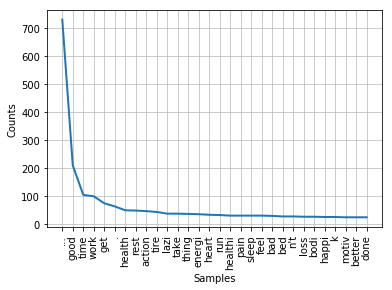

In [99]:
fdist.plot(30,cumulative=False)
plt.show(lemmatized_words)

In [100]:
# good, work, get, health, rest
# https://www.datacamp.com/community/tutorials/absolute-weighted-word-frequency

In [101]:
dfaction = ldf[['Q1', 'Q6','Q13']].copy()
dfinaction = ldf[['Q7', 'Q15','Q14']].copy()
dfrunning = ldf[['Q8', 'Q11','Q16']].copy()
dfsleeping = ldf[['Q10', 'Q9','Q17']].copy()

In [102]:
textn = dfaction.to_string(index = False)
strn = ''.join(textn)
strn=str1.lower()

In [103]:
text_list=['good', 'work', 'get', 'health', 'rest']

In [104]:
from collections import defaultdict
word_freq = defaultdict(int)
for text in text_list:
    for word in strn.split():
        word_freq[word] += 1

In [105]:
pd.DataFrame.from_dict(word_freq, orient='index') \
.sort_values(0, ascending=False) \
.rename(columns={0: 'abs_freq'})

,abs_freq
good,975
to,645
...,580
you,510
work,480
time,480
a,400
of,395
no,360
not,360


In [106]:
#https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21

In [123]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [124]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\avich\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [125]:
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [126]:
for w in ['dogs', 'ran', 'discouraged']:
    print(w, get_lemma(w), get_lemma2(w))

dogs dog dog
ran run ran
discouraged discourage discouraged


In [127]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avich\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [128]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [129]:
import random
text_data = []
with open('part3NLP.csv', encoding="utf8") as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        text_data.append(tokens)

In [130]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)

In [131]:
id2word=dictionary

In [132]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [133]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [136]:
import gensim
NUM_TOPICS = 8
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model8.gensim')

In [137]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.016*"sleep" + 0.012*"drought" + 0.011*"heart" + 0.010*"things"')
(1, '0.020*"boring" + 0.018*"fitness" + 0.018*"interest" + 0.016*"tiredness"')
(2, '0.030*"action" + 0.027*"running" + 0.022*"require" + 0.019*"inaction"')
(3, '0.023*"sleep" + 0.016*"running" + 0.009*"getting" + 0.008*"sleeping"')
(4, '0.011*"heart" + 0.010*"action" + 0.008*"better" + 0.008*"health"')
(5, '0.011*"strength" + 0.009*"cancel" + 0.008*"action" + 0.008*"feeling"')
(6, '0.016*"action" + 0.014*"energy" + 0.013*"health" + 0.010*"things"')
(7, '0.051*"action" + 0.016*"could" + 0.013*"getting" + 0.013*"health"')


In [120]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -7.207649990650931


In [75]:
'''new_doc = 'Practical Bayesian Optimization of Machine Learning Algorithms'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))'''

"new_doc = 'Practical Bayesian Optimization of Machine Learning Algorithms'\nnew_doc = prepare_text_for_lda(new_doc)\nnew_doc_bow = dictionary.doc2bow(new_doc)\nprint(new_doc_bow)\nprint(ldamodel.get_document_topics(new_doc_bow))"

In [76]:
'''ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 300, id2word=dictionary, passes=15)
ldamodel.save('model300.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)'''

"ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 300, id2word=dictionary, passes=15)\nldamodel.save('model300.gensim')\ntopics = ldamodel.print_topics(num_words=4)\nfor topic in topics:\n    print(topic)"

In [77]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -7.23149769187714


In [78]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.015*"might" + 0.012*"stress" + 0.010*"energy" + 0.009*"physical"')
(1, '0.021*"feeling" + 0.015*"better" + 0.012*"getting" + 0.011*"change"')
(2, '0.013*"something" + 0.013*"things" + 0.011*"sleep" + 0.011*"anything"')
(3, '0.028*"getting" + 0.011*"miss" + 0.010*"health" + 0.010*"healthy"')
(4, '0.013*"energy" + 0.010*"confidence" + 0.009*"sleep" + 0.008*"strength"')
(5, '0.015*"depression" + 0.011*"things" + 0.011*"heart" + 0.011*"better"')
(6, '0.027*"sleep" + 0.026*"running" + 0.013*"spend" + 0.013*"sleeping"')
(7, '0.024*"running" + 0.019*"inaction" + 0.017*"require" + 0.017*"action"')
(8, '0.017*"action" + 0.014*"better" + 0.013*"boring" + 0.011*"tiredness"')
(9, '0.069*"action" + 0.012*"inaction" + 0.011*"could" + 0.011*"take"')


In [79]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -7.211254114282798


In [80]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [81]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\avich\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [82]:
lda3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')
lda_display3 = pyLDAvis.gensim.prepare(lda3, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display3)

IndexError: index 383 is out of bounds for axis 1 with size 383

In [ ]:
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(text_data)
# Create Corpus
texts = text_data
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=text_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=text_data, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [102]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(1,len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

  1%|▍                                                                               | 3/540 [01:15<3:45:07, 25.15s/it]

KeyboardInterrupt: 

In [ ]:
np.array(model_results['Coherence']).shape

In [ ]:
model_results['Coherence']

In [ ]:
limit=271; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, model_results['Coherence'])
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence"), loc='best')
plt.show()

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
#https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

In [ ]:
#https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=f):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in text_data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

In [ ]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [ ]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

In [ ]:
####https://stats.stackexchange.com/questions/102932/comparing-topic-distributions-between-corpora-using-latent-dirichlet-allocation


# Get the mean of all topic distributions in one corpus
national_topic_vectors = []
for newspaper in national_corpus:
    national_topic_vectors.append(lda[newspaper])
national_average = numpy.average(numpy.array(national_topic_vectors), axis=0)

# Get the mean of all topic distributions in another corpus
regional_topic_vectors = []
for newspaper in regional_corpus:
    regional_topic_vectors.append(lda[newspaper])
regional_average = numpy.average(numpy.array(regional_topic_vectors), axis=0)

# Calculate the distance between the distribution of topics in both corpora
difference_of_distributions = numpy.linalg.norm(national_average - regional_average)

In [ ]:
#Finalizing the model

In [ ]:
amorale4@keeling src: $ cat DataAnalyzer.py
import pickle
import random
import re
import glob

import gensim
import numpy as np
import time
from DataReader import DataReader
from gensim.models import LdaModel
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize
from time import time


from sklearn.cluster import KMeans
import numpy as np

RSEED = 420369180
with open('stopwords.txt', 'r') as f_sw:
    eng_stopwords = [ l.strip() for l in f_sw.readlines() ] + stopwords.words('english')

pattern = re.compile(r'\b(' + r'|'.join(eng_stopwords) + r')\b\s*')
def preprocess_text(text):
    #clean_data = [ w.strip() for w in text if w not in eng_stopwords]
    clean_data = [pattern.sub('', example.lower())  for example in text ]
    clean_data = [re.sub(r"http\S+", "", example.lower()) for example in clean_data]
    X_text = [re.sub(r"\.com/\S+", "", example) for example in clean_data]
    X_text = [re.sub("^\d+\s|\s\d+\s|\s\d+$", "", example) for example in X_text]
    X_text = [re.sub('&#[0-9]*', '', x) for x in X_text]
    X_text = [re.sub('[0-9]+', '', x) for x in X_text]
    X_text = [re.sub('[\_]+', '', x) for x in X_text]
    X_text = [re.sub('[\n\r(?./-]', ' ', x) for x in X_text]
    return X_text

def gen_feature_vectorizer(type, min_docFreq = 10, max_docFreq = 0.70, max_totFeatures = 50000, vocab = None,
                           min_ngrams=1, max_ngrams=1, input_type='filename'):
    if type is 'tf':
        return CountVectorizer(input = input_type,stop_words=eng_stopwords, min_df=min_docFreq,ngram_range=(min_ngrams, max_ngrams),
                               max_features=max_totFeatures, max_df=max_docFreq, vocabulary=vocab)
    if type is 'tfb':
        return CountVectorizer(input = input_type,stop_words=eng_stopwords, min_df=min_docFreq,
                               max_features=max_totFeatures, max_df=max_docFreq, binary = True, vocabulary=vocab)
    else:
        return TfidfVectorizer(input = input_type,stop_words=eng_stopwords, min_df=min_docFreq,
                               max_features=max_totFeatures, max_df=max_docFreq, vocabulary=vocab)

def gen_glda_model_sv(vectorizer, n_topics, finalCorpus, update_mat = False, alpha='auto', eta="auto", ittrs=300 ):
    pprefix = '(gen_glda_model_sv):'
    tfMatrix = None
    if update_mat or tfMatrix == None:  # dont want to re-create the everytime we want to generate an lda_model (e.g. different topic numbers)
        # unless this is a new vectorizer, or a new corpus
        t0 = time()
        tfMatrix = vectorizer.fit_transform(finalCorpus)
        print(pprefix, "transform done in %0.3fs." % (time() - t0))
        print(pprefix, "tfMatrix shape:", tfMatrix.shape)

        tfMatrix = normalize(tfMatrix, norm='l1', axis=1)
        print(pprefix, 'type after normalize: ',type(tfMatrix))

    # invert vocabulary
    # idx_to_term
    vocab_key = []
    ind2vocab = None
    if ind2vocab == None:
        inv_vocabulary = {}
        i = 0
        for w in sorted(vectorizer.vocabulary_):
            #inv_vocabulary[vectorizer.vocabulary_[w]] = w
            inv_vocabulary[i] = w
            i+=1
            vocab_key.append(vectorizer.vocabulary_[w])
            # if vectorizer.vocabulary_[w] == 0:
            #     print(w)
    ind2vocab = inv_vocabulary
    tfMatrix = tfMatrix[:,vocab_key]
    print( ind2vocab [0], ind2vocab [1], ind2vocab [2])
    corpus = gensim.matutils.Sparse2Corpus(tfMatrix, documents_columns=False)

    np.random.seed(RSEED)
    random.seed(RSEED)
    lda = LdaModel(corpus, num_topics=n_topics, id2word=ind2vocab, alpha=alpha, eta=1.0/n_topics,
                   random_state= np.random.RandomState(RSEED), iterations=ittrs,
                   minimum_probability=0.001, minimum_phi_value=0.001 )

    print(pprefix, 'lda perplexity:', lda.log_perplexity(corpus))
    return lda, vocab_key, tfMatrix

def build_topic_model(text_data, n_topics=100, min_docFreq = 2, output_prefix = ''):
    pprefix = '(build_topic_model):'
    text = preprocess_text(text_data)
    print(pprefix, 'building topic models...')
    type = 'tf'
    vectorizer = gen_feature_vectorizer(type, input_type='content', max_docFreq=0.80, min_docFreq=min_docFreq)
    print(pprefix, 'vectorizer:', vectorizer)
    t0 = time()
    for t in text:
        print(t)
        break
    lda_model, vocab_key, tfMatrix = gen_glda_model_sv(vectorizer, n_topics, text)
    topics = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)
    topic_strings = {}

    for t_no, topic in topics:
        half = len(topic) / 2.0
        i = 0
        t_str = []
        for word, weight in topic:
            t_str.append(word)
            if i > half:
                t_str.append('\n')  # for display purposes

                i = 0
            i += 1

        topic_strings[t_no] = ' '.join(t_str)
        print(t_no, ':', topic_strings[t_no])


    with open( output_prefix + 'topic_model_topics_n=' + str(n_topics) + '.pickle', 'wb') as handle:
        pickle.dump(topic_strings, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print('[TopicFeatureVectorizer.py]: Time taken to build topics:', time() - t0)

    return lda_model, vectorizer, topic_strings, vocab_key, tfMatrix

def read_topic_model(filename = ''):
    with open (filename, 'rb') as handle:
        pkl_data = pickle.load(handle)

    for i in pkl_data:
        print( i, pkl_data[i] )

def debug():
    read_topic_model('observed_topic_model_topics_n=100.pickle')


# the idea is that we can create topic models from the individual comments or we can group based on the inspection or inspector and then
# create the topic models
def get_doc_representation():

    return

def main():
    # datafiles = ['dataset/FoodRep_2008.csv', 'dataset/FoodRep_2009.csv']
    datafiles = glob.glob('dataset/*.csv')
    output_prefix = 'msg_all'
    print(datafiles)
    dr = DataReader(filenames=datafiles)
    dr.read()
    inspector_dic = dr.read_by_inspector()
    msgs = []
    msg_len = []
    tot = 0
    for inspector in sorted(inspector_dic.keys()):
        msgs += inspector_dic[inspector]
        tot += len(inspector_dic[inspector])
        msg_len.append(tot)


    # print(dr.df['Insp Comm'].dropna())
    # print(dr.df['Observed'].dropna())
    # observed_data = dr.df['Observed'].dropna()
    lda_model, vectorizer, topic_strings, vocab_key, X_data = build_topic_model(msgs, output_prefix=output_prefix)

    if vocab_key:
        X_data = X_data[:,vocab_key]
    X_data = normalize(X_data, norm='l1', axis=1)  ## TODO: make this potentially optional
    corpus = gensim.matutils.Sparse2Corpus(X_data, documents_columns=False)
    # np.random.seed(self.RANDOM_SEED)
    # random.seed(self.RANDOM_SEED)
    result = lda_model[corpus]
    X = gensim.matutils.corpus2csc(result).transpose().toarray()
    print(np.shape(X))

    prev = 0
    inspectors = []
    for l in msg_len:
        inspectors.append(np.average(X[prev:l], axis=0))

    inspct_topic_rep = np.array(inspectors)

    kmeans = KMeans(n_clusters=15, random_state=RSEED).fit(inspct_topic_rep)
    for (i,j) in zip(sorted(inspector_dic.keys()), kmeans.labels_ ):
        print( j, ':', i)
    print(kmeans.cluster_centers_)
    print(kmeans.transform(inspct_topic_rep))

    with open( output_prefix + 'data.pickle', 'wb') as handle:
        pickle.dump({'kmeans':kmeans, 'inspct_topic_rep':inspct_topic_rep, 'lda_model':lda_model, 'tfidf_data':X_data,
                     'vectorizer':vectorizer, 'vocab_key':vocab_key}, handle, protocol=pickle.HIGHEST_PROTOCOL)


    return

if __name__ == '__main__':
    main()


In [79]:
jdf.drop('IPAddress',axis=1)
action=jdf[['Q1','Q6','Q13']]
inaction=jdf[['Q7','Q15','Q14']]
run=jdf[['Q8','Q11','Q16']]
sleep=jdf[['Q10','Q9','Q17']]

In [83]:
text_data1 = []
#with open('part3NLP.csv', encoding="utf8") as f:
for line in action:
    tokens1 = prepare_text_for_lda(line)
    text_data1.append(tokens1)

In [84]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data1)

In [85]:
corpus = [dictionary.doc2bow(text) for text in text_data1]

In [122]:
result = ldamodel[corpus]
X = gensim.matutils.corpus2csc(result).transpose().toarray()
print(X)
pd.DataFrame(X).to_csv("action1.csv")

[[0.58327359 0.         0.         0.         0.41085896 0.
  0.         0.        ]
 [0.         0.99472696 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.99275827 0.
  0.         0.        ]
 [0.         0.         0.98969024 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.99369723]
 [0.         0.         0.         0.         0.99614114 0.
  0.         0.        ]
 [0.         0.         0.99244821 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.99659228 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.99097037 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.98905015 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.99478537 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.9

In [81]:
#Done already
import gensim
NUM_TOPICS = 8
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model8.gensim')

In [ ]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

In [117]:
text_data1 = []
#with open('part3NLP.csv', encoding="utf8") as f:
for line in inaction:
    tokens1 = prepare_text_for_lda(line)
    text_data1.append(tokens1)
dictionary = corpora.Dictionary(text_data1)
corpus = [dictionary.doc2bow(text) for text in text_data1]
result = ldamodel[corpus]
Xi = gensim.matutils.corpus2csc(result).transpose().toarray()
pd.DataFrame(Xi).to_csv("inaction.csv")

In [90]:
text_data1 = []
#with open('part3NLP.csv', encoding="utf8") as f:
for line in run:
    tokens1 = prepare_text_for_lda(line)
    text_data1.append(tokens1)
dictionary = corpora.Dictionary(text_data1)
corpus = [dictionary.doc2bow(text) for text in text_data1]
result = ldamodel[corpus]
Xi = gensim.matutils.corpus2csc(result).transpose().toarray()
pd.DataFrame(Xi).to_csv("run.csv")

In [91]:
text_data1 = []
#with open('part3NLP.csv', encoding="utf8") as f:
for line in sleep:
    tokens1 = prepare_text_for_lda(line)
    text_data1.append(tokens1)
dictionary = corpora.Dictionary(text_data1)
corpus = [dictionary.doc2bow(text) for text in text_data1]
result = ldamodel[corpus]
Xi = gensim.matutils.corpus2csc(result).transpose().toarray()
pd.DataFrame(Xi).to_csv("sleep.csv")